<a href="https://colab.research.google.com/github/dragoa/MachineLearning/blob/main/ML/04/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification of MNIST digits

In this code, we are tackling the problem of **binary classification** on the MNIST dataset.
The MNIST dataset consists of handwritten digits (0-9), and we aim to classify digits as either 0 or 1, effectively converting the problem into a binary classification task.

This means that you are simplifying the original **multi-class classification problem** of recognizing all digits (0-9) and transforming it into a binary classification problem where you are **only interested in distinguishing between two specific digits**, which are 0 and 1. You want to build a model that can determine whether a given handwritten digit is a '0' or a '1.'

### We will perform the following steps:
1. Load the MNIST dataset from sklearn.
2. Preprocess the data, including converting labels to -1 (digit 0) and +1 (digit 1).
3. Split the data into a training set and a testing set.
4. Train two regression models (Ridge and Lasso) to learn the pixel contributions for classification.
5. Evaluate the models' performance using classification error and confusion matrices.
6. Visualize the learned weights (pixel contributions) for each model.



In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

The MNIST dataset is a collection of 70,000 grayscale images and have a resolution of 28x28 pixels, resulting in a total of 784 features (pixels) for each sample.

In [37]:
# Mnist dataset of images 28*28 px = 784 px
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [38]:
print(type(mnist))

# Our Data as a pandas DF
X = mnist.data
Y = mnist.target

print(X.shape, type(X))
print(Y.shape, type(Y))

<class 'sklearn.utils._bunch.Bunch'>
(70000, 784) <class 'pandas.core.frame.DataFrame'>
(70000,) <class 'pandas.core.series.Series'>


In [39]:
# Convert X and Y to NumPy arrays so we can us them
X = X.to_numpy()
Y = Y.to_numpy()

print(X.shape, type(X))
print(Y.shape, type(Y))

(70000, 784) <class 'numpy.ndarray'>
(70000,) <class 'numpy.ndarray'>


In [40]:
# We see that out target is not an integer so we need to convert it
print(type(Y[0]))

Y = np.asarray([eval(i) for i in Y])

print(type(Y[0]))

<class 'str'>
<class 'numpy.int64'>


Let's first analyse a simpler problem. The matching of digits 0 and 1.
So, we convert the multi-class problem into a binary classification task.
- All samples with the label 'dn' (digit 0) are set to -1 (negative class).
- All samples with the label 'dp' (digit 1) are set to +1 (positive class).
- 'mask' is used to filter the relevant samples.
- 'X' and 'Y' are updated to contain only the selected samples and binary labels.

I have to assign before the digit negative and then the one positive, otherwise
there's the risk that all my values in y becomes -1 (when 0 is first digit)


In [41]:
dn = 0
dp = 1
mask = (Y == dn) | (Y == dp)
X = X[mask,:]
Y = Y[mask]
Y[Y == dn] = -1 # negative class
Y[Y == dp] = +1 # positive class

In [42]:
X.shape

(14780, 784)

In [43]:
Y.shape

(14780,)

Since I have a lot of data and since the complexity is O(n**) what I can do is
subsamplig the data. <br>

I use more data for testing because it's cheaper than learning.

In [44]:
from random import sample

# Data used for training
n = 100
# Data used for testing
nt = 1000

# Randomly sample n+nt data points from the dataset
mask = np.asarray(sample(range(X.shape[0]),n+nt))

# Split the data into training and testing sets
X = X[mask,:]
Y = Y[mask]

# Create the testing set (Xt and Yt) using samples from n to n+nt
mask = range(n,n+nt)
Xt = X[mask,]
Yt = Y[mask]

# Create the testing set (Xt and Yt) using samples from n to n+nt
mask = range(0,n)
X = X[mask,]
Y = Y[mask]

print(X.shape)
print(Y.shape)
print(Xt.shape)
print(Yt.shape)

(100, 784)
(100,)
(1000, 784)
(1000,)


### Ridge Classifier with Hyperparameter Tuning and Evaluation

The objective function to minimize here is:

$$||y - Xw||^2_2 + alpha * ||w||^2_2$$

Thanks to the GridSearch we want to find the best hyperparameters for the  RidgeClassifier. The goal is to find the alpha value that results in the best accuracy.

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

grid = {'alpha'  : np.logspace(-4,3,30)}
MS = GridSearchCV(estimator   = RidgeClassifier(),
                  param_grid  = grid,
                  scoring     = 'accuracy',
                  cv          = 10)

# Fit the GridSearchCV to the training data to find the best hyperparameters.
H = MS.fit(X,Y)

M = RidgeClassifier(alpha = H.best_params_['alpha'])

# Retrain the model with the best hyperparameter.
M.fit(X,Y)

# Predictions
Yp = M.predict(Xt)

print(H.best_params_['alpha'])
print(np.mean(Yp * Yt <= 0))
print(confusion_matrix(Yt,Yp))

0.0001
0.012
[[448  10]
 [  2 540]]


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

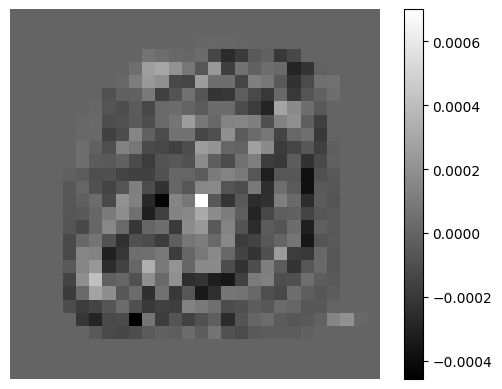

In [46]:
print(M.coef_)

# extract the weights from the Ridge regression model I
w = M.coef_

picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()

We want to use now the Lasso algorithm but for classification. Since sklearn doens't implement it we're gonna use Logistic Regression with an "l1" penalty to implement Lasso for binary classification.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Construction of the grid
grid = {'penalty' : ['l1'],
        'C'       : np.logspace(-4,3,30),
        'solver'  : ['liblinear']}

MS = GridSearchCV(estimator   = LogisticRegression(),
                  param_grid  = grid,
                  scoring     = 'accuracy',
                  cv          = 10)

H = MS.fit(X,Y)

M = LogisticRegression(penalty = H.best_params_['penalty'],
                       C       = H.best_params_['C'],
                       solver  = H.best_params_['solver'])

# Retrain on the model with best parameters
M.fit(X,Y)

Yp = M.predict(Xt)

print(np.mean(Yp * Yt <= 0))
print(confusion_matrix(Yt,Yp))

0.002
[[457   1]
 [  1 541]]


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

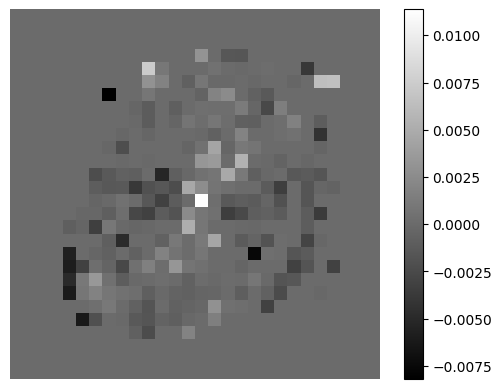

In [48]:
print(M.coef_)

# extract the weights from the Ridge regression model I
w = M.coef_

picture = np.reshape(w,(28,28))
fig, ax = plt.subplots()
plt.imshow(picture, cmap=plt.cm.gray)
ax.axis('off')
plt.colorbar()